In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image


import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import v2 # v2 is modern transform

import skimage
from skimage import data
from skimage import transform


In [26]:
torch.__version__

'2.9.0+cpu'

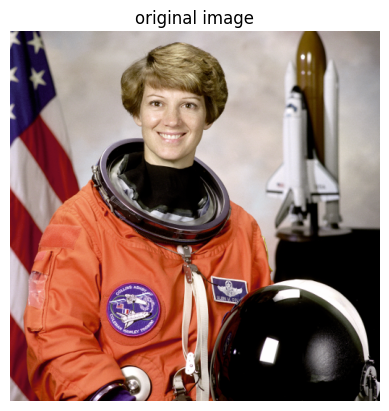

In [27]:
og_image = data.astronaut()
plt.title('original image')
plt.imshow(og_image)
plt.axis('off')
plt.show()

In [28]:
og_image.shape

(512, 512, 3)

# **Reshape**

In [29]:
reshape_image = og_image.reshape(og_image.shape[0],-1)
print(reshape_image.shape)

(512, 1536)


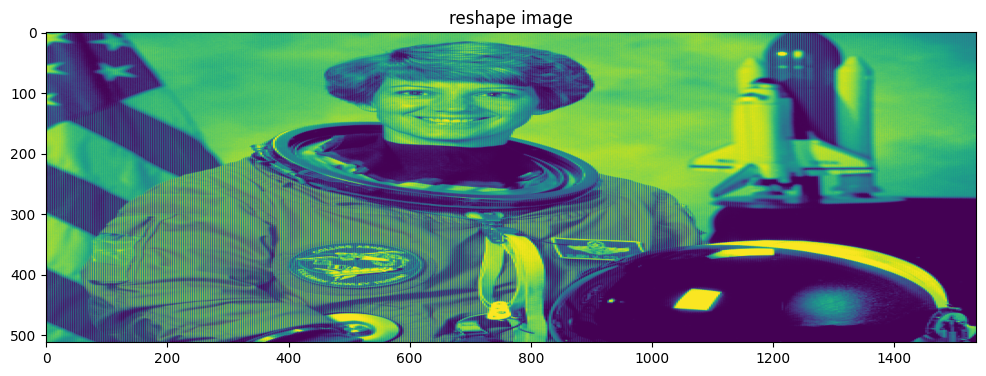

In [30]:
plt.figure(figsize = (12,12))
plt.title('reshape image')
plt.imshow(reshape_image)

# Resize

(100, 200, 3)


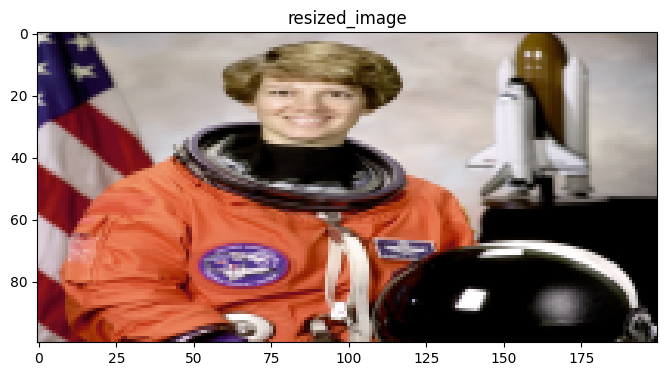

In [31]:
#with open opencv
import cv2

new_width = 200
new_height = 100
new_dimension = (new_width,new_height)
resized_image = cv2.resize(og_image,new_dimension,interpolation = cv2.INTER_AREA)

print(resized_image.shape)

plt.figure(figsize = (8,8))
plt.title('resized_image')
plt.imshow(resized_image)

plt.show()

(100, 200, 3)


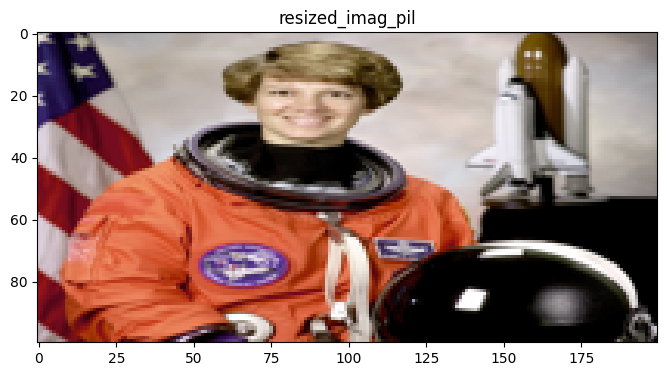

In [32]:
# using PIL

from PIL import Image

image_array = Image.fromarray(og_image)
resized_pil_img = image_array.resize((200,100))


resized_image = np.array(resized_pil_img)

print(resized_image.shape)

plt.figure(figsize = (8,8))
plt.title('resized_imag_pil')
plt.imshow(resized_image)
plt.show()

In [33]:
### Reversing color order from rgb to bgr used in certain frameworks such as opencv

(512, 512, 3)


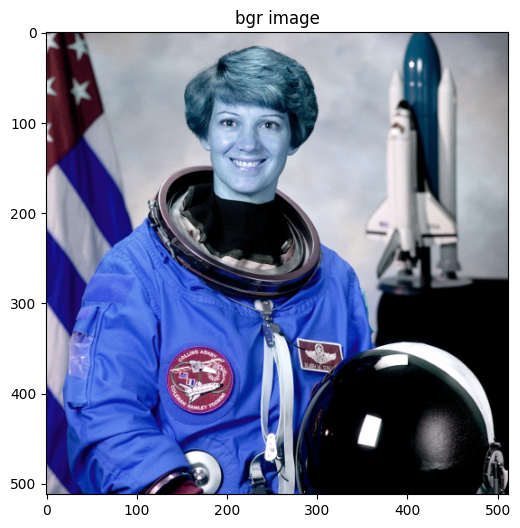

In [35]:
image_bgr = og_image[:,:,(2,1,0)]
print(image_bgr.shape)

plt.figure(figsize = (6,6))
plt.title('bgr image')
plt.imshow(image_bgr)

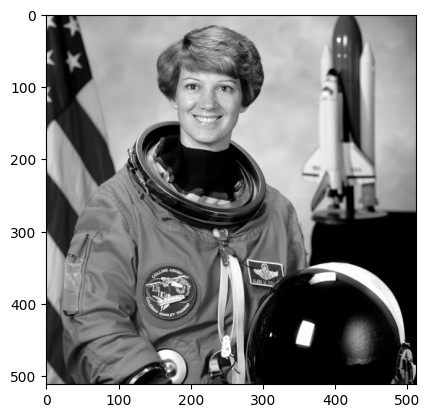

In [38]:
### Gray image

gray_image = skimage.color.rgb2gray(og_image)
plt.imshow(gray_image,cmap = 'gray')


# Preprocessing with pytorch

In [55]:
img_tensor = v2.ToImage()(og_image)

transform = v2.Compose([v2.ToDtype(torch.uint8,scale = True),
                        v2.RandomResizedCrop(size = (224,224),antialias = True),
                        v2.RandomHorizontalFlip(p = 0.5),
                        v2.ToDtype(torch.float32,scale = True),
                        v2.Normalize(mean = [0.485,0.456,0.406],std = [0.229,0.224,0.225])
                        ])

transformed_image = transform(img_tensor)
print(transformed_image.shape)
print(transformed_image.min())
print(transformed_image.max())



torch.Size([3, 224, 224])
tensor(-2.1179)
tensor(2.6400)


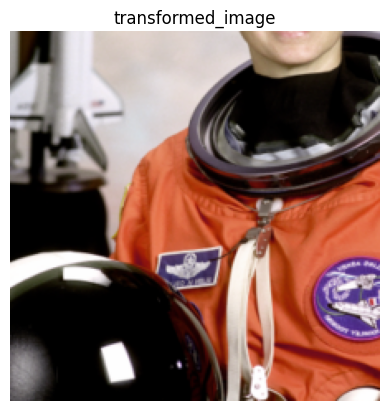

In [56]:
mean = torch.tensor([0.485,0.456,0.406]).view(3,1,1)
std = torch.tensor([0.229,0.224,0.225]).view(3,1,1)

display_image = transformed_image*std+mean


# clamping ensure they stay withing a valid displayable range

display_image = display_image.clamp(0,1)
plt.figure()
plt.imshow(display_image.permute(1,2,0).numpy())
plt.title('transformed_image')
plt.axis('off')
plt.show()

# Data Augmentation

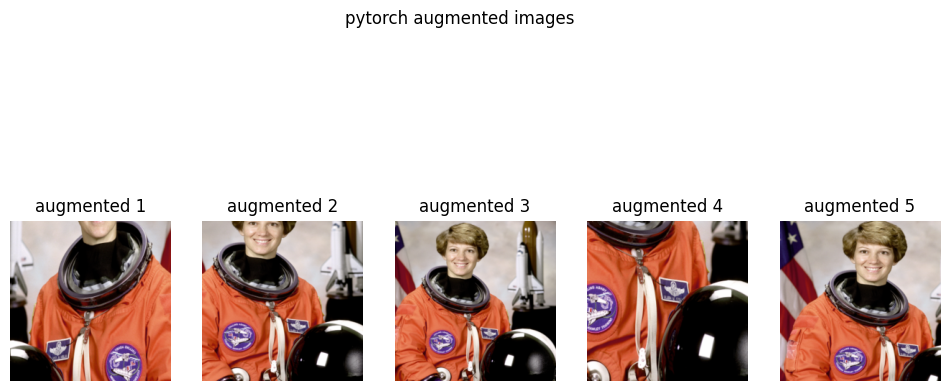

In [61]:
plt.figure(figsize = (12,6))

for i in range(5):
  aug_image = transform(img_tensor)
  display_aug_image = aug_image*std+mean
  display_aug_image = display_aug_image.clamp(0,1)
  plt.subplot(1,5,i+1)
  plt.imshow(display_aug_image.permute(1,2,0).numpy())
  plt.title(f"augmented {i+1}")
  plt.axis('off')
plt.suptitle('pytorch augmented images')
plt.show()
